In [1]:
using Distributions
using Plots
using Optim

traceon = Optim.Options(
    store_trace = true,
    extended_trace = true
)

# model
Distributions.TDist(μ, ρ, ν) = LocationScale(μ, ρ, TDist(ν))

# test data
X = [-0.01, 0.01, 1.0]

# Warning: Very Slow!
lower = [-0.1, -15.0, -2.5]
upper = [ 0.4,  10.0,  8.0]
@show lower upper
r = @time optimize(x -> -loglikelihood(TDist(x[1], 10^x[2], 10^x[3]), X), lower, upper, [0.33, 0.0, 0.27], Fminbox(LBFGS()), traceon)

lower = [-0.1, -15.0, -2.5]
upper = [0.4, 10.0, 8.0]
180.739126 seconds (1.97 G allocations: 43.152 GiB, 4.54% gc time, 1.86% compilation time)


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.292407e+01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 2.52e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.76e-12 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.54e+00 ≰ 1.0e-08

 * Work counters
    Seconds run:   178  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    55096360
    ∇f(x) calls:   55096360


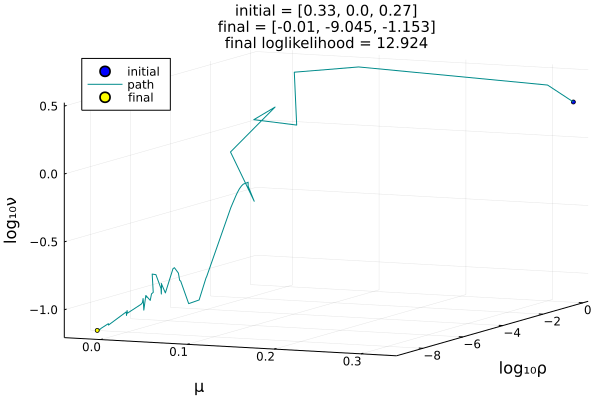

In [2]:
function plot_trace(r)
    x = r.initial_x
    c = hcat(x, (t.metadata["x"] for t in r.trace)...)
    l = -minimum(r)
    m = r.minimizer
    t = "initial = $x\nfinal = $(round.(m; digits=3))\nfinal loglikelihood = $(round(l; digits=3))"

    plot(; legend=:topleft)
    scatter3d!([x[1]], [x[2]], [x[3]]; label="initial", c=:blue, ms=3)
    plot!(c[1,:], c[2,:], c[3,:]; label="path", c=:darkcyan)
    scatter3d!([m[1]], [m[2]], [m[3]]; label="final", c=:yellow, ms=3)
    plot!(; xlabel="μ", ylabel="log₁₀ρ", zlabel="log₁₀ν")
    title!(t; titlefontsize=10)
end

plot_trace(r)
plot!(; fmt=:png)

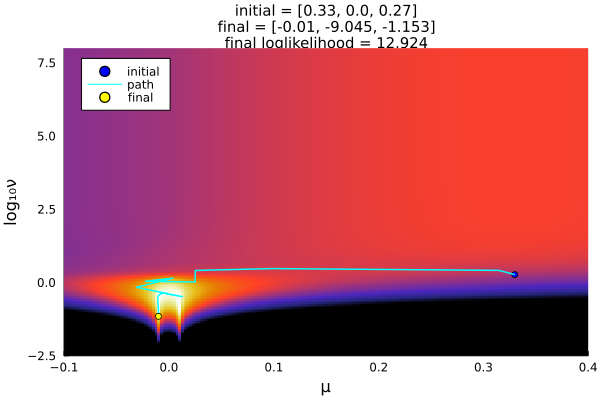

In [3]:
function f(μ, log10ν, X)
    log10rhos = range(-15, 10; length=200)
    -maximum(loglikelihood(TDist(μ, 10^log10ρ, 10^log10ν), X) for log10ρ in log10rhos)
end

function plot_trace2d(r)
    x = r.initial_x
    c = hcat(x, (t.metadata["x"] for t in r.trace)...)
    l = -minimum(r)
    m = r.minimizer
    t = "initial = $x\nfinal = $(round.(m; digits=3))\nfinal loglikelihood = $(round(l; digits=3))"

    mus = range(-0.1, 0.4; length=200)
    log10nus = range(-2.5, 8.0; length=200)
    z = f.(mus', log10nus, Ref(X))

    plot(; legend=:topleft, colorbar=false)
    plot!(; xlim=extrema(mus), ylim=extrema(log10nus))
    heatmap!(mus, log10nus, z; clim=(-1, 5), c=reverse(cgrad(:CMRmap)))
    scatter!([x[1]], [x[3]]; label="initial", ms=4, c=:blue)
    plot!(c[1,:], c[3,:]; label="path", c=:cyan, lw=1.5)
    scatter!([m[1]], [m[3]]; label="final", ms=4, c=:yellow)
    plot!(; xlabel="μ", ylabel="log₁₀ν")
    title!(t; titlefontsize=10)
end

plot_trace2d(r)
plot!(; fmt=:png)